In [1]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
# %% module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from xgboost.sklearn import XGBClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
#from sklearn import utils

In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

## Read file

In [5]:
# use pandas library to read.csv file of features and stor in a dataframe object
df = pd.read_csv(r'assignment_AI.csv', parse_dates = True)

In [6]:
df.head()

,patient,measurement0,measurement1,measurement2,measurement3,measurement4,measurement5,measurement6,measurement7,measurement8,...,measurement491,measurement492,measurement493,measurement494,measurement495,measurement496,measurement497,measurement498,measurement499,measurement500
0,patient0,7.460,6.384,9.227,2.5270,6.055,7.706,9.582,10.830,8.586,...,6.179,6.314,2.3690,5.656,5.076,8.182,7.278,1.478,7.233,0.0
1,patient1,8.785,7.549,9.172,1.4420,7.929,9.023,10.600,11.560,8.939,...,4.802,9.160,3.9360,6.669,2.867,8.602,8.447,4.544,8.521,0.0
2,patient2,8.796,7.282,10.700,3.4520,9.112,9.173,10.190,11.370,7.913,...,5.756,7.455,2.4960,7.159,11.350,6.903,8.017,5.684,7.192,0.0
3,patient3,8.802,8.741,10.360,4.6440,7.576,9.298,9.493,9.899,8.407,...,8.397,1.441,3.4970,6.429,6.634,5.744,8.198,2.865,7.169,0.0
4,patient4,8.869,8.554,10.020,0.7363,6.452,9.321,10.740,11.100,7.172,...,5.086,11.670,0.7363,7.131,4.296,7.365,7.191,4.028,8.488,0.0


In [7]:
y = df[['measurement0']].copy()
X = df.drop(['measurement0'], axis=1).copy()

In [8]:
# saving patient number for later. 
patient_Num = df[['patient']].copy()

In [9]:
# Omission of patient number, not helpful with prediction
X.drop('patient', axis=1, inplace=True)

In [10]:
Columens_list = X.columns

# correlation matrix

# drop highly correlated feature

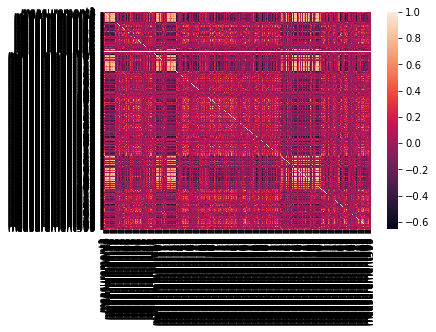

In [12]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

# Select the most corelated featuers with the Tag

In [13]:
Threshold = 0.85
drop_list = []

In [14]:
for i in range(0, len(Columens_list)):
    for j in range(i+1, len(Columens_list)):
        ii = Columens_list[i]
        jj = Columens_list[j]
        #print (abs(corr[ii][jj]))
        abs_corr = abs(corr[ii][jj])
        if abs_corr >= Threshold:
            drop_list.append(ii)
            break
print (drop_list)

['measurement5', 'measurement6', 'measurement8', 'measurement9', 'measurement10', 'measurement11', 'measurement12', 'measurement14', 'measurement17', 'measurement18', 'measurement20', 'measurement21', 'measurement22', 'measurement58', 'measurement100', 'measurement103', 'measurement105', 'measurement115', 'measurement120', 'measurement122', 'measurement124', 'measurement129', 'measurement131', 'measurement134', 'measurement135', 'measurement136', 'measurement154', 'measurement267', 'measurement323', 'measurement333', 'measurement343', 'measurement348', 'measurement352', 'measurement355', 'measurement358', 'measurement360', 'measurement361', 'measurement362', 'measurement363', 'measurement365', 'measurement367', 'measurement368', 'measurement371', 'measurement372', 'measurement375', 'measurement378', 'measurement381', 'measurement382', 'measurement384', 'measurement385', 'measurement387', 'measurement389', 'measurement392', 'measurement397', 'measurement399', 'measurement401', 'measurem

In [15]:
X.drop(drop_list, axis=1, inplace=True)

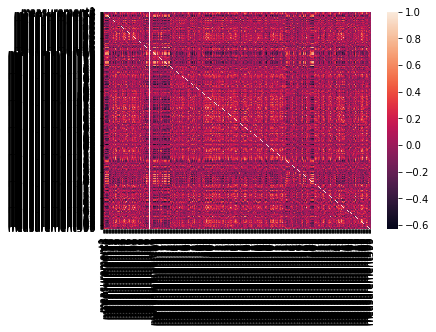

In [16]:
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

In [17]:
X.head()

,measurement1,measurement2,measurement3,measurement4,measurement7,measurement13,measurement15,measurement16,measurement19,measurement23,...,measurement491,measurement492,measurement493,measurement494,measurement495,measurement496,measurement497,measurement498,measurement499,measurement500
0,6.384,9.227,2.5270,6.055,10.830,2.916,9.896,10.76,7.409,8.862,...,6.179,6.314,2.3690,5.656,5.076,8.182,7.278,1.478,7.233,0.0
1,7.549,9.172,1.4420,7.929,11.560,5.419,10.850,10.44,7.841,8.672,...,4.802,9.160,3.9360,6.669,2.867,8.602,8.447,4.544,8.521,0.0
2,7.282,10.700,3.4520,9.112,11.370,4.474,10.020,10.88,7.905,10.360,...,5.756,7.455,2.4960,7.159,11.350,6.903,8.017,5.684,7.192,0.0
3,8.741,10.360,4.6440,7.576,9.899,3.170,9.742,10.43,7.726,8.621,...,8.397,1.441,3.4970,6.429,6.634,5.744,8.198,2.865,7.169,0.0
4,8.554,10.020,0.7363,6.452,11.100,3.998,10.490,10.84,7.209,9.684,...,5.086,11.670,0.7363,7.131,4.296,7.365,7.191,4.028,8.488,0.0


## Data Farme Scaling

In [18]:
X = pd.DataFrame(X)

In [19]:
X.describe()

,measurement1,measurement2,measurement3,measurement4,measurement7,measurement13,measurement15,measurement16,measurement19,measurement23,...,measurement491,measurement492,measurement493,measurement494,measurement495,measurement496,measurement497,measurement498,measurement499,measurement500
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,...,514.000000,514.00000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,8.913228,11.487946,5.676782,7.349214,8.366467,2.303969,8.872399,9.563196,5.597315,7.805047,...,6.598874,10.30770,3.677376,7.594682,3.984398,7.013167,8.458160,3.239829,8.573642,0.017106
std,0.825581,1.212809,3.010438,0.907098,1.129222,1.014738,1.061765,0.951745,1.348336,0.702687,...,1.671070,2.63420,2.002107,1.368075,1.574299,1.353694,0.725218,1.520497,1.284922,0.119601
min,6.239000,7.484000,0.000000,3.404000,4.876000,0.000000,6.059000,7.176000,2.479000,5.926000,...,2.128000,0.55000,0.000000,0.496700,0.000000,3.128000,6.109000,0.000000,4.769000,0.000000
25%,8.407000,10.682500,3.276500,6.767500,7.534000,1.656000,8.168000,8.851500,4.613750,7.335500,...,5.365000,8.76075,2.336000,6.767000,3.034000,6.123000,8.051500,2.111500,7.773250,0.000000
50%,8.936500,11.510000,5.340500,7.393500,8.321500,2.239500,8.879000,9.479500,5.600500,7.783500,...,6.620000,10.74500,3.411000,7.646500,3.858000,7.101000,8.504000,3.111500,8.441500,0.000000
75%,9.401250,12.360000,7.901750,7.928250,9.203750,2.915250,9.508000,10.150000,6.556000,8.223750,...,7.674750,12.36000,4.647750,8.518000,4.864500,8.019500,8.923250,4.296000,9.298000,0.000000
max,11.410000,14.900000,13.240000,11.240000,11.560000,6.519000,13.300000,13.110000,9.177000,10.750000,...,13.370000,14.97000,11.360000,11.110000,11.760000,10.220000,11.620000,7.779000,12.970000,1.611000


In [20]:
columns = X.columns

In [21]:
X = min_max_scaler.fit_transform(X)
y = min_max_scaler.fit_transform(y)

In [22]:
X.shape, y.shape

((514, 443), (514, 1))

In [23]:
from sklearn.feature_selection import SelectPercentile, f_regression
X = SelectPercentile(f_regression, percentile=16).fit_transform(X, y)
X.shape

(514, 71)

In [24]:
X.shape, y.shape

((514, 71), (514, 1))

## Lasso linear model
The best model is selected by cross-validation 

In [25]:
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression

In [26]:
def LR (x, y):
    # Split the data into 20% test and 80% training
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
    # Create linear regression object
    regr = LinearRegression()
    # Train the model using the training sets
    regr.fit(x_train, y_train)
    # Make predictions using the testing set
    y_test_p = regr.predict(x_test)
    y_train_p = regr.predict(x_train)
    # Mean Squared Error
    MSLE_test = mean_squared_error(y_test, y_test_p)
    print ('MSE test:', MSLE_test)
    MSLE_train = mean_squared_error(y_train, y_train_p)
    print ('MSE train:', MSLE_train)
    R2_test = r2_score(y_test, y_test_p)
    R2_train = r2_score(y_train, y_train_p)
    print ('r2_test:', R2_test)
    print ('r2_train:', R2_train)
    return (regr)

In [27]:
def Lasso (x, y):
    # Split the data into 20% test and 80% training
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
    # Create linear regression object
    regr = LassoCV(cv=5, random_state=12)
    # Train the model using the training sets
    regr.fit(x_train, y_train)
    # Make predictions using the testing set
    y_test_p = regr.predict(x_test)
    y_train_p = regr.predict(x_train)
    # Mean Squared Error
    MSLE_test = mean_squared_error(y_test, y_test_p)
    print ('MSE test:', MSLE_test)
    MSLE_train = mean_squared_error(y_train, y_train_p)
    print ('MSE train:', MSLE_train)
    R2_test = r2_score(y_test, y_test_p)
    R2_train = r2_score(y_train, y_train_p)
    print ('r2_test:', R2_test)
    print ('r2_train:', R2_train)
    return (regr)

In [28]:
regr = LR(X, y)

MSE test: 0.002428588123741784
MSE train: 0.003482813675765917
r2_test: 0.7065241841501984
r2_train: 0.7005294300531639


## Get features in use of the model

In [29]:
# get features in use of the model 
model = SelectFromModel(regr, prefit=True, max_features=50)
print((model.get_support(indices=True)))
LR_X = model.transform(X)
print (LR_X.shape[1])
features_list = model.get_support(indices=True)
features = model.get_support(indices=False)
print ('Feature selection list = ' , len(features_list))

[ 1  3  4  6 11 14 17 21 23 24 26 30 32 35 36 37 41 42 44 46 50 53 54 56
 58 61 63 66 67 68 70]
31
Feature selection list =  31


In [30]:
# Transporm to DataFrame
LR_Features = pd.DataFrame(model.get_support(indices=True), columns=['Reg Fetures'])

# Print Selected Features To File
## File Name:Features Output

In [32]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Features Output.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
LR_Features.to_excel(writer, sheet_name='Regression')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

## Threshold seting / investigating the Severity Distribution 

In [33]:
y = pd.DataFrame(y)
y.shape

(514, 1)

<Figure size 1440x864 with 0 Axes>

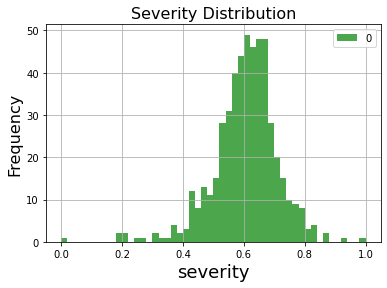

In [34]:
plt.figure(figsize=(20,12));
y.plot.hist(alpha=0.7, bins=50, facecolor='g')
plt.xlabel('severity', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.title('Severity Distribution', fontsize=16)
#plt.xlim(0.15, 1)
plt.grid(True)
plt.show();

In [35]:
y.describe()

,0
count,514.000000
mean,0.606062
std,0.106572
min,0.000000
25%,0.553279
50%,0.614009
75%,0.667660
max,1.000000


## Severity Level New Column 

In [36]:
X.shape, y.shape

((514, 71), (514, 1))

In [37]:
Threshold = y.mode()[0]
print ('Threshold:', Threshold)

Threshold: 0    0.584203
Name: 0, dtype: float64


#### I would rather set the threshold as mean + one standard deviation. 
#### But it will create unbalanced dataset that cause problems in the classification process. 
#### So I chose median threshold conditions, which would create balanced dataset.

In [38]:
y[y >=Threshold]=1
y[y <Threshold]=0

In [39]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.028041,0.890784,0.447308,0.529899,0.736041,0.608624,0.627474,0.231912,0.887222,0.506847,...,0.857864,0.492621,0.952738,0.791667,0.083223,1.000000,0.879796,0.161178,0.804965,0.212121
1,0.253336,1.000000,0.831262,0.661649,0.800537,0.569237,0.564610,0.221906,0.768015,0.502054,...,0.834903,0.374809,0.662899,0.714689,0.307873,0.778463,0.998256,0.253435,0.708473,0.424242
2,0.201702,0.971574,0.686302,0.547024,0.810093,0.919154,0.444354,0.364086,0.968926,0.480553,...,0.910008,0.577990,0.798726,0.682062,0.484327,0.890312,1.000000,0.272192,0.847167,0.346217
3,0.483852,0.751496,0.486271,0.508631,0.783368,0.558665,0.608847,0.483096,0.796678,0.596549,...,0.692767,0.683206,0.714785,0.948446,0.727005,0.732186,0.775162,0.000000,0.812089,0.379060
4,0.447689,0.931179,0.613284,0.611932,0.706181,0.779022,0.353551,0.226962,0.535494,0.589838,...,0.739865,0.096819,0.619028,0.540395,0.867550,0.605524,0.000000,0.359978,0.534808,0.196335


## Building a classifier

## XGBoost

In [40]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)

In [41]:
y.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [48]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [58]:
def XGBoost(x, y):
    # Split the data into 20% test and 80% training
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
    # Create Classifier object
    #clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf = XGBClassifier(booster = 'gbtree')
    #clf = MLPClassifier(alpha=1, max_iter=1000)
    # Train the model using the training sets
    #clf = GaussianMixture(n_components=2, covariance_type="spherical")
    
    clf.fit(x_train, y_train)
    # Make predictions using the testing set
    y_test_p = clf.predict(x_test)
    y_train_p = clf.predict(x_train)
    cm = confusion_matrix(y_test, y_test_p)
    print ('confusion matrix:')
    print (cm)
    # Accuray Score on train dataset
    accuracy_test = accuracy_score(y_test, y_test_p)
    print ('Accuracy_test:', accuracy_test)
    accuracy_train = accuracy_score(y_train, y_train_p)
    print ('Accurac_train:', accuracy_train)
    return (clf, cm)

In [51]:
X_train.shape, y_train.shape

((411, 71), (411, 1))

In [53]:
from sklearn.feature_selection import SelectPercentile, f_regression
test = SelectPercentile(f_regression, percentile=5)
fit = test.fit(X_train, y_train)
X_trainn = test.transform(X_train)
X_test = test.transform(X_test)
X_trainn.shape, X_test.shape

((411, 4), (103, 4))

In [59]:
clf, cm = XGBoost(X_trainn, y_train)

[22:04:51] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix:
[[16 16]
 [15 56]]
Accuracy_test: 0.6990291262135923
Accurac_train: 1.0


In [60]:
y_test_p = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_p)
print ('confusion matrix:')
print (cm)
accuracy_test = accuracy_score(y_test, y_test_p)
print ('Accuracy_test:', accuracy_test)

confusion matrix:
[[17 15]
 [13 58]]
Accuracy_test: 0.7281553398058253


In [61]:
# Get the features used in the model 
model = SelectFromModel(clf, prefit=True, max_features=500)
print((model.get_support(indices=True)))
Class_Features = model.get_support(indices=True)
print ('Feature selection list = ' , len(Class_Features))

[1 3]
Feature selection list =  2


# Print Selected Features To File

In [62]:
Class_Features = pd.DataFrame(model.get_support(indices=True), columns=['Class_Features'])

## Get the features used in the model

In [63]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Features Output.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
LR_Features.to_excel(writer, sheet_name='Regression')
Class_Features.to_excel(writer, sheet_name='classification')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Comparing Features

In [64]:
common_Features = list(set(LR_Features['Reg Fetures']) & set(Class_Features['Class_Features']))

In [65]:
print('The common features are:',common_Features)
print ('The number of features:',len(common_Features))

The common features are: [1, 3]
The number of features: 2


## Summary

In [66]:
print ('The number of features in Classifier              :',len(Class_Features['Class_Features']))
print ('The number of features in Regression              :',len(LR_Features['Reg Fetures']))
print ('The number of features in Classifier & Regression :',len(common_Features))

The number of features in Classifier              : 2
The number of features in Regression              : 31
The number of features in Classifier & Regression : 2
